In [1]:
# %matplotlib notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

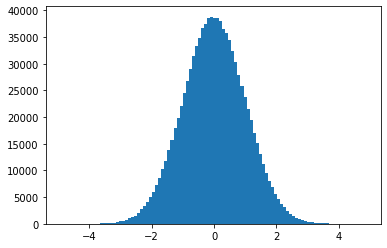

In [2]:
s = np.random.normal(0, 1, 1000000)
plt.hist(s, bins=100)
plt.show()

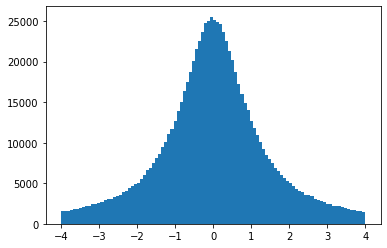

In [3]:
s = np.random.standard_cauchy(1000000)
s = s[(s>-4) & (s<4)]  # truncate distribution so it plots well
plt.hist(s, bins=100)
plt.show()

## EvolutionAlg class

In [4]:
import numpy as np
from evolutionalg import *

In [5]:
def fitness(population):
    return [np.abs((x[0] + x[1])) for x in population]

def fitness2(population):
    return [-x[0] * (x[0] - 1) * (x[0] - 2) * (x[0] - 3) * (x[0] - 4) for x in population]

def fitness3(population):
    return [0.1*max(-x[0] * (x[0] - 1) * (x[0] - 2) * (x[0] - 3) * (x[0] - 4), 0) for x in population]

In [6]:
def normal_distribution(x, mean, dev):
    return 1. / (dev * np.sqrt(2*np.pi)) * np.power(np.e, -0.5 * ((x - mean) / dev)**2)

def two_gauss(x):
    return normal_distribution(x, 10, 2) + normal_distribution(x, -2, 3.5)

def fitness4(population):
    return [two_gauss(x[0]) for x in population]

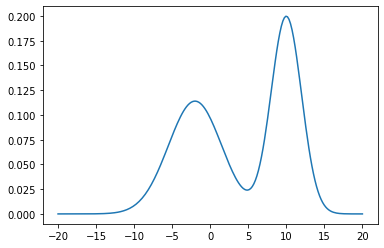

In [7]:
k = 50
# x = np.linspace(0.5, 6, k).reshape((k,1))
# x = np.linspace(-10, 6, k).reshape((k,1))
x = np.linspace(-20, 20, 200)
plt.plot(x, two_gauss(x))

population4 = np.linspace(-20, 20, 20).reshape((20, 1))

In [8]:
e = EvolutionAlg()
population = np.array([[1,2], [3,4], [3,1], [4,2], [5,3], [6,2]])

population2 = np.array([[2], [4], [1], [1.5], [4], [2.5], [3], [1.7]])

population3 = np.array([[0.596], [1.067], [1.184], [1.431], [1.641],
[1.792], [2.068], [2.495], [3.169], [3.785]])

f = fitness3(population3)
print(f)

e.run(population3, fitness3, 20, 4, mutation='normal', mutation_std=0.25, verbosity=1)

[0.0, 0.03781505904798928, 0.09090927175925757, 0.14145432093338492, 0.12106217070657993, 0.0787394768928768, 0.0, 0.0, 0.11284544429031514, 0.31756850201343745]
population after  1 step
[[3.93321268]
 [1.22619311]
 [1.58647199]
 [3.785     ]]
population after  2 step
[[3.81592649]
 [3.74749902]
 [1.27507409]
 [2.30963918]]
population after  3 step
[[4.41109349]
 [3.68323116]
 [1.17359562]
 [1.83816982]]
population after  4 step
[[3.68323116]
 [1.43551126]
 [1.74605384]
 [4.14945167]]
population after  5 step
[[3.92327187]
 [1.67621571]
 [1.27157897]
 [3.68323116]]
population after  6 step
[[3.86539322]
 [3.84707462]
 [1.39928971]
 [3.68323116]]
population after  7 step
[[3.68323116]
 [3.81765424]
 [3.77572764]
 [3.55543583]]
population after  8 step
[[3.24706674]
 [3.42402023]
 [3.56229161]
 [3.68323116]]
population after  9 step
[[3.68323116]
 [3.70539776]
 [3.47777706]
 [3.55429126]]
population after  10 step
[[3.28354105]
 [3.82037305]
 [3.22543547]
 [3.67936382]]
population after 

array([[3.68977984],
       [3.47343373],
       [3.6404411 ],
       [3.80224426]])

In [9]:
#population = np.array([[1,2], [3,4], [3,1], [4,2], [5,3], [6,2]])
e.run(population3, fitness3, 20, 4, mutation='cauchy', verbosity=1)

population after  1 step
[[2.14053655]
 [4.91827712]
 [3.77747375]
 [1.92849264]]
population after  2 step
[[1.4534903 ]
 [3.3901865 ]
 [3.77747375]
 [1.88695017]]
population after  3 step
[[3.77747375]
 [3.16021123]
 [2.70994705]
 [2.27152392]]
population after  4 step
[[ 4.6386898 ]
 [-4.94939831]
 [ 2.6577671 ]
 [ 3.749605  ]]
population after  5 step
[[-5.44291398]
 [ 3.70154149]
 [ 3.09116789]
 [-1.78301175]]
population after  6 step
[[-4.66857823]
 [-6.72134148]
 [ 2.20086898]
 [-6.89714026]]
population after  7 step
[[ -5.38571931]
 [-10.08267555]
 [ -3.85262849]
 [ -5.10752754]]
population after  8 step
[[ -4.94522686]
 [ -6.41563516]
 [-10.08267555]
 [ -4.67295893]]
population after  9 step
[[ -9.64210938]
 [ -6.08627848]
 [-11.43854616]
 [ -7.70540351]]
population after  10 step
[[-12.65198614]
 [-10.67795812]
 [ -8.10695209]
 [-15.95592801]]
population after  11 step
[[-15.95592801]
 [-12.45620598]
 [-10.26147595]
 [-12.63351907]]
population after  12 step
[[-17.10066911]
 [

array([[-77.27414413],
       [-57.18171579],
       [-42.6833881 ],
       [-58.66350817]])

In [10]:
help(e.run)

Help on method run in module evolutionalg:

run(population, fitness_function, iterations, children_num, mutation='normal', mutation_std=1, crossover_method='arithmetic', crossover_threshold=0.5, verbosity=0) method of evolutionalg.EvolutionAlg instance
    Runs evolution algorithm
    
    Parameters:
    poulation - 2D np.array with population
    fitness_function - informs how good each individual is. It must 
                       accept 2D np.array as the input and return
                       1D array with non-negative values
    iterations - number of iterations
    children_num - number of children generated in each iteration
    mutation - mutation distribution: 'normal' or 'cauchy'
    mutation_std - value of standard deviation for a normal distribution
    crossover_method - String 'arithmetic' or 'binary'. For binary
                       weights are 0 or 1. In arithmetic they are
                       in range <0,1>.
    crossover_threshold - number in range <0,1>. Part

# Local minima

## Fitness function

In [11]:
def normal_distribution(x, mean, dev):
    return 1. / (dev * np.sqrt(2*np.pi)) * np.power(np.e, -0.5 * ((x - mean) / dev)**2)

def two_gauss(x):
    return normal_distribution(x, 10, 2) + normal_distribution(x, -2, 3.5)

def fitness_gauss(population):
    return [two_gauss(x[0]) for x in population]

def plot_population(population):
    x = np.linspace(-20, 20, 200)
    plt.plot(x, two_gauss(x))
    plt.scatter(population, two_gauss(population), c='r')
    
def plot_populations(populations):
    n = 3;
    fig, axs = plt.subplots(n, n, figsize=(16,8))
    x = np.linspace(-20, 20, 200)
    for i, p in enumerate(populations):
        axs[int(i/n), i%n].plot(x, two_gauss(x))
        axs[int(i/n), i%n].scatter(p, two_gauss(p), c='r')

## Initial population

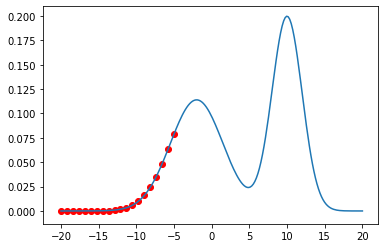

In [12]:
population = np.linspace(-20, -5, 20)
population = population.reshape((population.shape[0], 1))
plot_population(population)

## Parameters

In [13]:
iterations = 40;
children_num = 10;
crossover = 'arithmetic'
crossover_threshold = 0.6

## Normal distribution

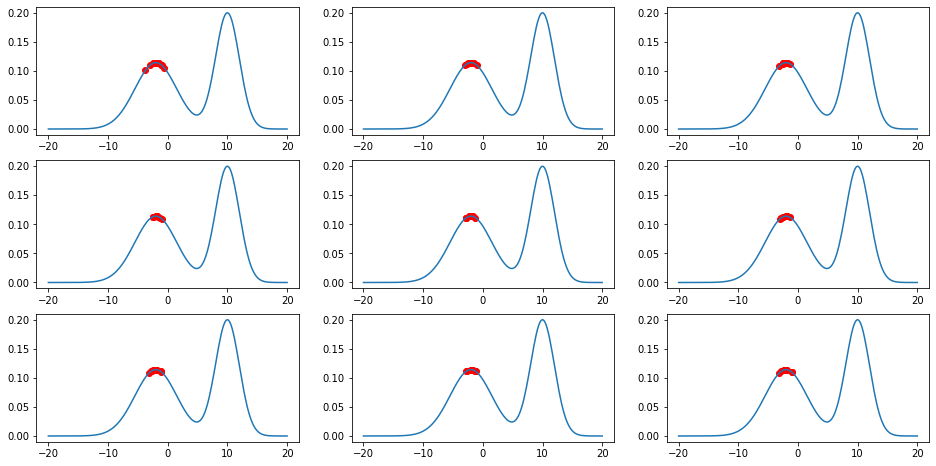

In [14]:
e = EvolutionAlg()
normal_populations = []
for _ in range(9):
    normal_populations.append(e.run(population, fitness_gauss, iterations, children_num, mutation='normal',
                                    mutation_std=0.5, crossover_threshold=crossover_threshold))
plot_populations(normal_populations)

## Normal distribution - high std 

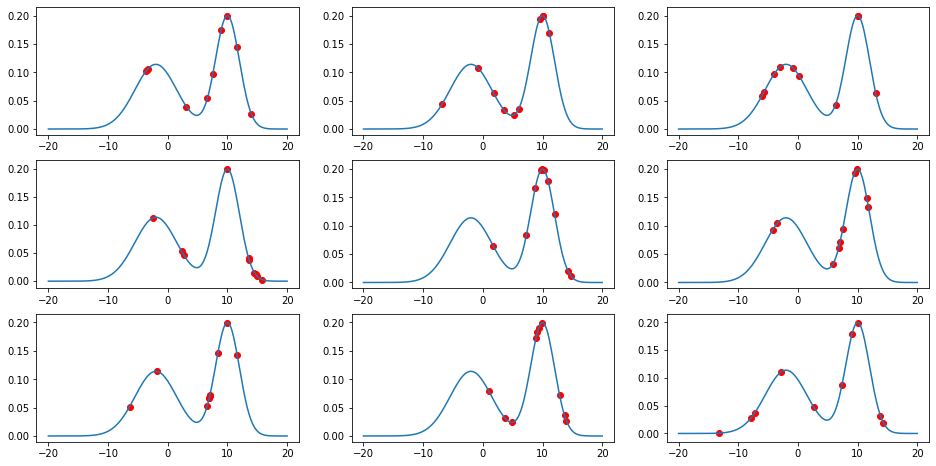

In [15]:
normal_populations2 = []
for _ in range(9):
    normal_populations2.append(e.run(population, fitness_gauss, iterations, children_num, mutation='normal',
                                    mutation_std=4, crossover_threshold=crossover_threshold))
plot_populations(normal_populations2)

## Cauchy distribution

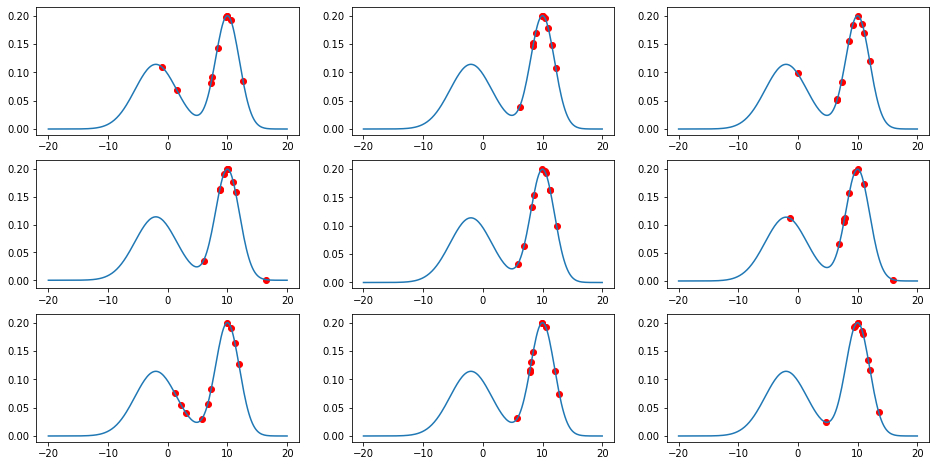

In [16]:
cauchy_populations = []
for _ in range(9):
    cauchy_populations.append(e.run(population, fitness_gauss, iterations, children_num, mutation='cauchy', crossover_threshold=crossover_threshold))
plot_populations(cauchy_populations)

## Wnioski
1. Standardowy algorytm z rozkładem normalnym i małym odchyleniem standardowym (0.25) osiąga lokalne maksimum. 
* Standardowy algorytm z rozkładem normalnym i dużym odchyleniem standardowym (4) osiąga globalne maksimum, populacja jest jednak stosunkowo rozproszona.
* Algorytm z rozkładem Cauchy'ego jest w osiąga globalne maksimum, populacja jest skupiona bliżej maksimum niż w przypadku 2)


# Przypadek 3D - prosty

In [17]:
from mpl_toolkits import mplot3d

### Funkcja przystosowania
Oparta na 4 Gaussach

In [18]:
def gauss_3d(x, y, A, x0, y0, sX, sY):
    val_x = (x - x0)**2 / (2 * sX**2)
    val_y = (y - y0)**2 / (2 * sY**2)
    return A * np.exp(-(val_x + val_y))

def four_gauss(x, y):
    return gauss_3d(x, y, 1, -1, -1, 1.5, 1.5) + gauss_3d(x, y, 0.75, 2, 2, 1.25, 1.25)\
    + gauss_3d(x, y, 0.75, 2, -2, 1, 1) + gauss_3d(x, y, 0.75, -2, 2, 1.5, 1)

def fitness_four_gauss(population):
    return [four_gauss(x[0], x[1]) for x in population]

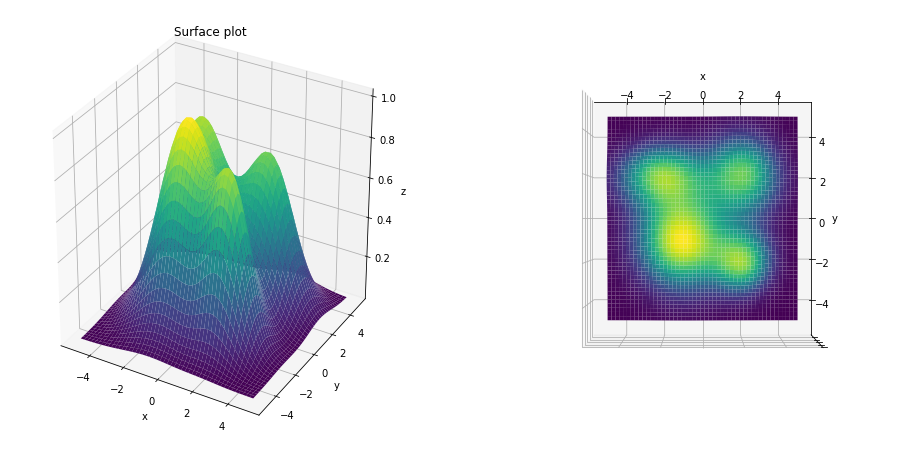

In [19]:
x = np.outer(np.linspace(-5, 5, 50), np.ones(50))
y = x.copy().T # transpose
z = four_gauss(x, y)

fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.view_init(azim=-90, elev=90)
ax2.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax2.zaxis.set_ticklabels([])
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.show()

## Populacja osobników

In [20]:
k = 10
xvalues = np.array(np.linspace(-5, 5, k))
yvalues =  xvalues

xx, yy = np.meshgrid(xvalues, yvalues, indexing='ij')
population = np.array([xx, yy]).transpose(1, 2, 0).reshape(k**2, 2)
zz = four_gauss(xx, yy)

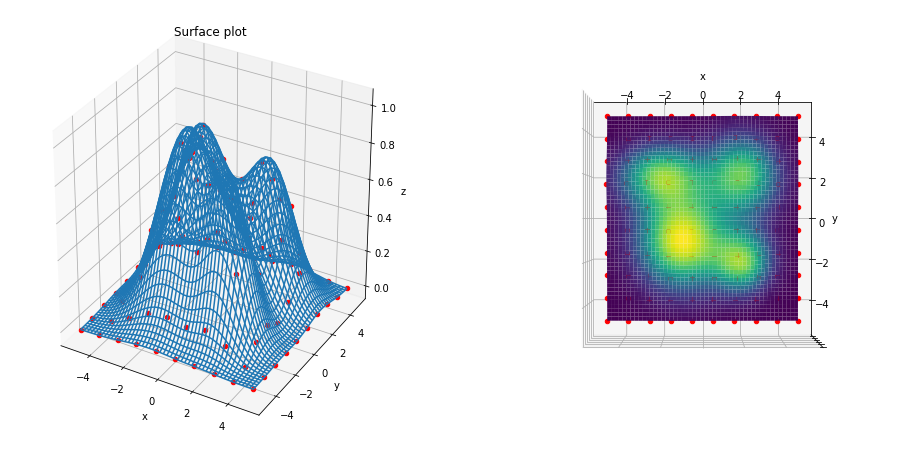

In [21]:
x = np.outer(np.linspace(-5, 5, 50), np.ones(50))
y = x.copy().T # transpose
z = four_gauss(x, y)

fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(x, y, z)
# ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.scatter(xx, yy, zz, color='r', depthshade=False)
ax.set_title('Surface plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.view_init(azim=-90, elev=90)
# ax.plot_wireframe(x, y, z)
ax2.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax2.scatter(xx, yy, zz, color='r', depthshade=False)
ax2.zaxis.set_ticklabels([])
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.show()

In [22]:
iterations = 40;
children_num = k**2;
crossover = 'arithmetic'
crossover_threshold = 0.6

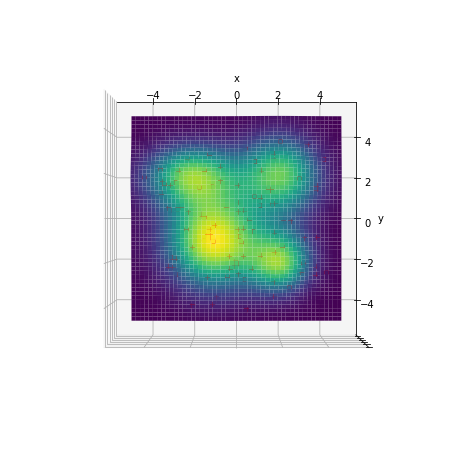

In [23]:
res = e.run(population, fitness_four_gauss, iterations, children_num, mutation='normal',
                                    mutation_std=0.5, crossover_threshold=crossover_threshold)

xx = res[:, 0]
yy = res[:, 1]
zz = four_gauss(xx, yy)
fig = plt.figure(figsize=(8, 8))

ax2 = fig.add_subplot(projection='3d')
ax2.view_init(azim=-90, elev=90)
ax2.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax2.scatter(xx, yy, zz, color='r', depthshade=False)
ax2.zaxis.set_ticklabels([])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()